# Unit4 Examples

In [1]:
# Ten flips of a fair coin
# This example is to show different priors affect your belief
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

## Unit 4.2

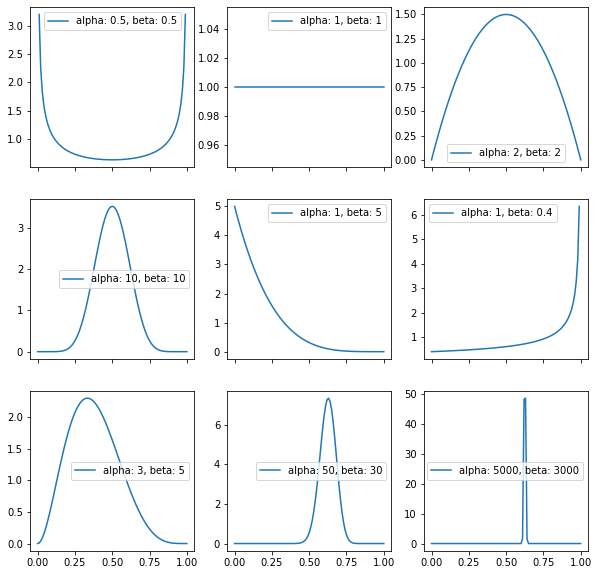

In [51]:
### 9 parameters

xx = [i for i in np.arange(0, 1.01, 0.01)]
yy = []
y = pm.Beta.dist(0.5, 0.5)

alpha = [0.5, 1, 2, 10, 1, 1, 3, 50, 5000]
beta = [0.5, 1, 2, 10, 5, 0.4, 5, 30, 3000]

fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
col_index = 0
row_index = 0

for i in range(len(alpha)):
    y = pm.Beta.dist(alpha[i], beta[i])
    yy = []
    for j in xx:
        yy.append(np.exp(y.logp(j).eval()))
    
    
    axs[row_index, col_index%3].plot(xx, yy)
    axs[row_index, col_index%3].legend(["alpha: {}, beta: {}".format(alpha[i], beta[i])])

    col_index += 1
    if col_index % 3 == 0:
        row_index += 1

plt.show()

Different priors belong to statistician belief. Of course, choosing an appropriate prior is important.

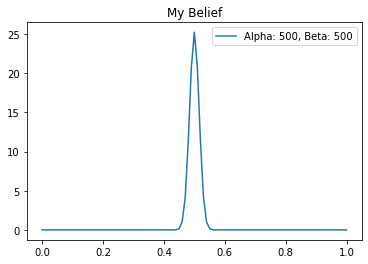

In [52]:
# Fair coin I believe mean is 1/2
xx = [i for i in np.arange(0, 1.01, 0.01)]
yy = []
y_belief = pm.Beta.dist(500, 500)

for i in xx:
    yy.append(np.exp(y_belief.logp(i).eval()))

plt.plot(xx, yy)
plt.title("My Belief")
plt.legend(["Alpha: 500, Beta: 500"])
plt.show()

## Unit 4.5 Credible set

In [54]:
gamma = pm.Gamma.dist(alpha=4, beta=29)

In [4]:
xx = np.arange(0, 0.6, 0.001)
yy = np.exp(gamma.logp(xx).eval())

In [8]:
gamma.random(size=5000)

array([0.08857158, 0.04769609, 0.07044139, ..., 0.19405309, 0.13004446,
       0.1924565 ])

In [26]:
# Find HPD Credible set
k = 0.857368863848
rand_gamma = gamma.random(size=50000)
az.hdi(rand_gamma, 0.95)

array([0.02455121, 0.27280094])

In [30]:
np.exp(gamma.logp(0.02455121).eval())

0.8559493893421972

In [31]:
np.exp(gamma.logp(0.27280094).eval())

0.8773559430003515

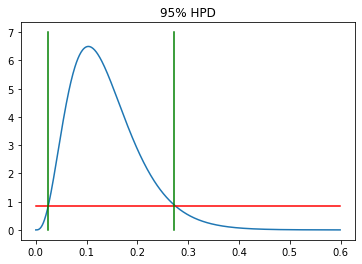

In [43]:
xx = np.arange(0, 0.6, 0.001)
kk = [0.855 for i in xx]


plt.plot(xx, yy)
plt.plot(xx, kk, 'r')
plt.plot([0.02455121, 0.02455121], [0, 7], 'g')
plt.plot([0.27280094, 0.27280094], [0, 7], 'g')
plt.title("95% HPD")
plt.show()

In [68]:
# Equi-tailed CS
from scipy.stats import gamma
xx = np.arange(0, 0.6, 0.001)
y_int = []
for i in xx:
    y_int.append(gamma.cdf(i, 4, loc=0, scale=1/29))

In [75]:
c_25 = 0
c_75 = 0
for i in y_int:
    if i <= 0.025:
        c_25 += 1
    if i <= 0.975:
        c_75 += 1

In [78]:
xx[c_25-1]

0.037

In [79]:
xx[c_75-1]

0.302

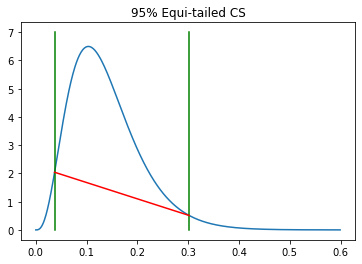

In [84]:
plt.plot(xx, yy)
plt.plot([0.037, 0.037], [0, 7], 'g')
plt.plot([0.302, 0.302], [0, 7], 'g')
plt.plot([0.037, 0.302], [gamma.pdf(0.037, 4, loc=0, scale=1/29), gamma.pdf(0.302, 4, loc=0, scale=1/29)], 'r')
plt.title("95% Equi-tailed CS")
plt.show()

## Unit 4.6 Prior Elicitation

### eBay Story

You  decided to purchase a new Orbital Shaking Incubator for your research lab on eBay.

Two sellers are offering this item  for the same price with free shipping.

The seller  A has 95% positive feedback from 100 responders while the seller B has 100% positive feedback from 3 responders. 

We assume that all 103 responders are different unrelated customers, to avoid dependent responses.

From which seller to order?

In [2]:
# priors_a = [pm.Beta('p', 1, 1), pm.Beta('p', 1/2, 1/2), pm.Beta('p', 30, 2), pm.Beta('p', 0, 0), pm.LogitNormal('p', mu=3, tau=6)]
# priors_b = [pm.Beta('p', 1, 1), pm.Beta('p', 1/2, 1/2), pm.Beta('p', 30, 2), pm.Beta('p', 0, 0), pm.LogitNormal('p', mu=3, tau=6)]
na = 100
nb = 3
pos_a = 95
pos_b = 3

### Uniform priors

In [8]:
with pm.Model() as model:
    # priors
    p0a = pm.Beta('p0a', 1, 1)

    # likelihood
    obs_a = pm.Binomial("obs_a", n=100, p=p0a, observed=pos_a)

    # sample
    trace1_a = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p0a]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 5996.83draws/s]


In [5]:
with pm.Model() as model:
    # priors
    p0b = pm.Beta('p0b', 1, 1)

    # likelihood
    obs_b = pm.Binomial("obs_b", n=3, p=p0b, observed=pos_b)

    # sample
    trace1_b = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p0b]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 5298.62draws/s]
The acceptance probability does not match the target. It is 0.7168188370462439, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7068645244574981, but should be close to 0.8. Try to increase the number of tuning steps.


In [ ]:
pm.summary(trace1_a)["mean"][0] - pm.summary(trace1_b)["mean"][0]

### Jeffreys'  priors

In [15]:
with pm.Model() as model:
    # priors
    p1a = pm.Beta('p1a', 1/2, 1/2)

    # likelihood
    obs_a = pm.Binomial("obs_a", n=100, p=p1a, observed=pos_a)

    # sample
    trace2_a = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p1a]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 5525.35draws/s]
The acceptance probability does not match the target. It is 0.8843066282695577, but should be close to 0.8. Try to increase the number of tuning steps.


In [17]:
with pm.Model() as model:
    # priors
    p1b = pm.Beta('p0b', 1/2, 1/2)

    # likelihood
    obs_b = pm.Binomial("obs_b", n=3, p=p1b, observed=pos_b)

    # sample
    trace2_b = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p0b]
Sampling 4 chains, 3 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 5199.97draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


In [18]:
pm.summary(trace2_a)["mean"][0] - pm.summary(trace2_b)["mean"][0]

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


0.07699999999999996

###  Informative priors centered at about 93% and 97%

In [19]:
with pm.Model() as model:
    # priors
    p3a = pm.Beta('p3a', 30, 2)

    # likelihood
    obs_a = pm.Binomial("obs_a", n=100, p=p3a, observed=pos_a)

    # sample
    trace3_a = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p3a]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 5540.43draws/s]


In [20]:
with pm.Model() as model:
    # priors
    p3b = pm.Beta('p0b', 2.9, 0.1)

    # likelihood
    obs_b = pm.Binomial("obs_b", n=3, p=p3b, observed=pos_b)

    # sample
    trace3_b = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p0b]
Sampling 4 chains, 673 divergences: 100%|██████████| 6000/6000 [00:02<00:00, 2540.54draws/s]
There were 162 divergences after tuning. Increase `target_accept` or reparameterize.
There were 202 divergences after tuning. Increase `target_accept` or reparameterize.
There were 170 divergences after tuning. Increase `target_accept` or reparameterize.
There were 139 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [21]:
pm.summary(trace3_a)["mean"][0] - pm.summary(trace3_b)["mean"][0]

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


-0.03200000000000003

### Logit centered at 3 gives mean probs close to 95%

In [27]:
with pm.Model() as model:
    # priors
    p4a = pm.LogitNormal('p4a', mu=3, tau=1)

    # likelihood
    obs_a = pm.Binomial("obs_a", n=100, p=p4a, observed=pos_a)

    # sample
    trace4_a = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p4a]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 5768.09draws/s]
The acceptance probability does not match the target. It is 0.8921876828408946, but should be close to 0.8. Try to increase the number of tuning steps.


In [28]:
with pm.Model() as model:
    # priors
    p4b = pm.LogitNormal('p4b', mu=3, tau=1)

    # likelihood
    obs_b = pm.Binomial("obs_b", n=3, p=p4b, observed=pos_b)

    # sample
    trace4_b = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p4b]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 5886.63draws/s]


In [29]:
pm.summary(trace4_a)["mean"][0] - pm.summary(trace4_b)["mean"][0]

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


0.007000000000000006

###  Zellner priors prop to 1/(p * (1-p))

In [43]:
from scipy.special import logit
def Zellner(x):
    return logit(1/20000)

In [46]:
with pm.Model() as model:
    # priors
    p5a = pm.DensityDist('p5a', logp=Zellner)

    # likelihood
    obs_a = pm.Binomial("obs_a", n=100, p=p5a, observed=pos_a)

    # sample
    trace5_a = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p5a]
Sampling 4 chains, 0 divergences:   5%|▍         | 281/6000 [00:00<00:02, 2808.13draws/s]/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
Sampling 4 chains, 0 divergences:   5%|▌         | 302/6000 [00:02<00:39, 142.84draws/s] 
Bad initial energy, check any log probabilities that are inf or -inf, nan or very small:
obs_a   -inf


ParallelSamplingError: Bad initial energy

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [36]:
with pm.Model() as model:
    # priors
    p5b = pm.Flat('p5b')

    # likelihood
    obs_b = pm.Binomial("obs_b", n=3, p=p5b, observed=pos_b)

    # sample
    trace5_b = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p5b]
Sampling 4 chains, 0 divergences:   4%|▎         | 218/6000 [00:00<00:07, 739.21draws/s]/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
Sampling 4 chains, 0 divergences:   5%|▍         | 298/6000 [00:06<02:02, 46.60draws/s] 
Bad initial energy, check any log probabilities that are inf or -inf, nan or very small:
obs_b   -inf


ParallelSamplingError: Bad initial energy

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [34]:
pm.summary(trace5_a)["mean"] - pm.summary(trace5_b)["mean"]

/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


p5a    0.941
Name: mean, dtype: float64